In [181]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.table import QTable

from cluster import Cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [182]:
# load 21 cm data
data_21cm = np.loadtxt('data/driskell2022.csv', delimiter=',')
upper = data_21cm[np.where(data_21cm[:,1]>2*1e-41)]
lower = data_21cm[np.where(data_21cm[:,1]<2*1e-41)]
vertical = np.array([lower[-1], upper[-1]])

In [183]:
# load this work data (GalWeight clusters)
galwcls=pd.read_csv('galwcls.dat', sep='|', header=None)
cls_data = {'sig500': galwcls[:][8],
            'M500': galwcls[:][11],
            'r200': galwcls[:][13],
            'sig200':galwcls[:][15],
            'M200':galwcls[:][18]}
units = {'sig500': u.km/u.s,
            'M500': u.Msun,
            'r200': u.Mpc,
            'sig200': u.km/u.s,
            'M200': u.Msun, }
cls_table = QTable(cls_data, units=units)
r200_avg = np.mean(cls_table['r200'])
M200_avg = np.mean(cls_table['M200'])
sig200_avg = np.mean(cls_table['sig200'])
M500_avg = np.mean(cls_table['M500'])
cls_avg = Cluster(r200_avg, M200_avg, sig200_avg, m500=M500_avg)

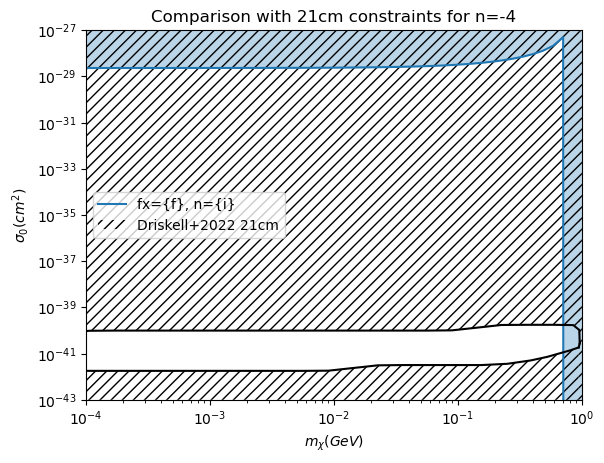

In [184]:
# plot limits
y1=1e-43
y2=1e-27
x1=1e-4
x2=1e0
plt.xlim(x1, x2)
plt.ylim(y1, y2)


# Plot this work constraint
cls_avg.plot_sigma0_vs_m_chi(n=[-4], region=True)


# Plot Driskell+ 2022 21 cm constraint
plt.loglog(upper[:,0], upper[:,1], color='k')
plt.loglog(lower[:,0], lower[:,1], color='k')
plt.loglog(vertical[:,0], vertical[:, 1], color='k')
plt.fill_between(upper[:,0], upper[:,1], y2=y2, hatch='///', alpha=0, label='Driskell+2022 21cm')
plt.fill_between(lower[:,0], lower[:,1], y2=y1, hatch='///', alpha=0)
plt.fill_betweenx([y1,y2], vertical[:,0], x2, hatch='///', alpha=0)


plt.title("Comparison with 21cm constraints for n=-4")
plt.legend()